# Data Quality Report e Detecção de Fraudes em Transações Imobiliárias

A Prevensão de Fraude é uma estratégia eficaz que podem ser tomada para evitar ou reduzir a fraude. O projeto aqui é construir um score de fraude para um conjunto de dados real de transação imobiliária. 

Uma empresa forneceseguros para imóveis na cidade de Nova Iorque nos EUA. Visando calcular o valor do seguro da melhor forma possível,realizaremos uma análise e detecção de fraude nos dados de transações imobiliárias de toda cidade. Os dados são públicos e fornecidos pelo portal de dados abertos da cidade de Nova Iorque.

O projeto demonstrará um relatório confiáveis e coerentese que a qualidade da informação que eles oferecempode ser usada para prever possíveis fraudes.

Sendo assim, iremos apresentar um DQR –Data Quality Report. e na segunda etapa criaremos score para cada transaçãoa fim de checar aquelas commaior possibilidadede ter alguma fraude. O Score de Fraude (Fraud Score) deve ser o mais preciso possívele deve ser gerado um score para cada transação.Não há informação prévia se uma transação foi ou não fraudulenta.

![logo](imagens/projeto.png)

## 1. Data Quality Report (DQR)

O DQR é um relatório analítico com o objetivo de compreender a organização dos dados, se estão coerentes, se há alguma anomalia amplamente visível e resumir os dados (ou pelo menos as variáveis mais importantes) com base na compreensão do problema de negócio.


### 1.1 Instalando os Pacototes

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x : '%.2f' % x)
%matplotlib inline

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.4


In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Rodolfo Terra | Ciência de dados" --iversions

Author: Rodolfo Terra | Ciência de dados

numpy     : 1.19.5
matplotlib: 3.4.1
pandas    : 1.2.3
seaborn   : 0.11.1



### 1.2. Carregando os Dados 

In [4]:
dados = pd.read_csv('dados/dataset.csv', index_col = 0)

In [5]:
# Shape 
dados.shape

(1070994, 31)

In [6]:
# Visualiza
dados.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


In [7]:
# Resumo
print('_ __ __ __ __ __ __ \n')
print(" RESUMO DOS DADOS  \n")
print('_-_-_-_-_-_-_-_-_-_\n')
print("Linhas: ", dados.shape[0])
print("Colunas: ", dados.shape[1])
print('\n-_-_-_-_-_-_-_-_-_-_')
print('\nVariáveis: \n\n', dados.columns.tolist())
print('\n-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-')
print('\nValores Ausentes: \n\n', dados.isnull().sum())
print('\n-_-_-_-_-_-_-_-_-_-_')
print('\nValores Únicos: \n\n', dados.nunique())
print('_ __ __ __ __ __ __ ')



_ __ __ __ __ __ __ 

 RESUMO DOS DADOS  

_-_-_-_-_-_-_-_-_-_

Linhas:  1070994
Colunas:  31

-_-_-_-_-_-_-_-_-_-_

Variáveis: 

 ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

Valores Ausentes: 

 BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2     

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 1 to 1070994
Data columns (total 31 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   BBLE      1070994 non-null  object 
 1   B         1070994 non-null  int64  
 2   BLOCK     1070994 non-null  int64  
 3   LOT       1070994 non-null  int64  
 4   EASEMENT  4636 non-null     object 
 5   OWNER     1039249 non-null  object 
 6   BLDGCL    1070994 non-null  object 
 7   TAXCLASS  1070994 non-null  object 
 8   LTFRONT   1070994 non-null  int64  
 9   LTDEPTH   1070994 non-null  int64  
 10  EXT       354305 non-null   object 
 11  STORIES   1014730 non-null  float64
 12  FULLVAL   1070994 non-null  float64
 13  AVLAND    1070994 non-null  float64
 14  AVTOT     1070994 non-null  float64
 15  EXLAND    1070994 non-null  float64
 16  EXTOT     1070994 non-null  float64
 17  EXCD1     638488 non-null   float64
 18  STADDR    1070318 non-null  object 
 19  ZIP       1041104 non

In [9]:
# Colunas numéricas (Quanyitativas)
num_cols = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', \
            'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']

# Colunas Catgóricas
cat_cols = ['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'EXCD1', 'STADDR', 'ZIP',\
            'EXMPTCL', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

In [10]:
# Verificando se o total de variáveis está coberta nos objetos anteriores
len(num_cols) + len(cat_cols) == dados.shape[1]

True

In [11]:
# Dataframe com os tipos diferentes de variáveis
df_num = dados[num_cols]
df_cat = dados[cat_cols]

In [12]:
# Sumário estatístico das variáveis numéricas
summ_num = pd.DataFrame(index = df_num.columns)
summ_num['Tipo de Dado'] = df_num.dtypes.values
summ_num['# Registros Não Nulos'] = df_num.count().values
summ_num['# Registros Não Zero'] = df_num.astype(bool).sum(axis = 0)
summ_num['% Populado'] = round(summ_num['# Registros Não Nulos'] / df_num.shape[0]*100,2)
summ_num['# Valores Únicos'] = df_num.nunique().values
summ_num['Mean'] = round(df_num.mean(),2)
summ_num['Std'] = round(df_num.std(),2)
summ_num['Min'] = round(df_num.min(),2)
summ_num['Max'] = round(df_num.max(),2)
summ_num

,Tipo de Dado,# Registros Não Nulos,# Registros Não Zero,% Populado,# Valores Únicos,Mean,Std,Min,Max
LTFRONT,int64,1070994,901886,100.00,1297,36.64,74.03,0.00,9999.00
LTDEPTH,int64,1070994,900866,100.00,1370,88.86,76.40,0.00,9999.00
STORIES,float64,1014730,1070994,94.75,111,5.01,8.37,1.00,119.00
FULLVAL,float64,1070994,1057987,100.00,109324,874264.51,11582430.99,0.00,6150000000.00
AVLAND,float64,1070994,1057985,100.00,70921,85067.92,4057260.06,0.00,2668500000.00
AVTOT,float64,1070994,1057987,100.00,112914,227238.17,6877529.31,0.00,4668308947.00
EXLAND,float64,1070994,579295,100.00,33419,36423.89,3981575.79,0.00,2668500000.00
EXTOT,float64,1070994,638422,100.00,64255,91186.98,6508402.82,0.00,4668308947.00
BLDFRONT,int64,1070994,842179,100.00,612,23.04,35.58,0.00,7575.00
BLDDEPTH,int64,1070994,842141,100.00,621,39.92,42.71,0.00,9393.00


In [13]:
# sumário estatístico das variáveis categóricas
summ_cat = pd.DataFrame(index = df_cat.columns)
summ_cat['Tipo de Dado'] = df_cat.dtypes.values
summ_cat['# Registros Não Nulos'] = df_cat.count().values
summ_cat['% Populado'] = round(summ_cat['# Registros Não Nulos'] / df_cat.shape[0]*100,2)
summ_cat['# Valores Únicos'] = df_cat.nunique().values

In [14]:
# Adiciona mais uma coluna com valores mais comuns
temp = []
for col in cat_cols:
    temp.append(df_cat[col].value_counts().idxmax())
summ_cat['Valores Mais Comuns'] = temp

summ_cat

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos,Valores Mais Comuns
BBLE,object,1070994,100.00,1070994,2044920061
B,int64,1070994,100.00,5,4
BLOCK,int64,1070994,100.00,13984,3944
LOT,int64,1070994,100.00,6366,1
EASEMENT,object,4636,0.43,12,E
OWNER,object,1039249,97.04,863346,PARKCHESTER PRESERVAT
BLDGCL,object,1070994,100.00,200,R4
TAXCLASS,object,1070994,100.00,11,1
EXT,object,354305,33.08,3,G
EXCD1,float64,638488,59.62,129,1017.0


### 1.3 Indentificação, Exploração e Visualização das Variáveis

In [15]:
# Variáveis
dados.columns

Index(['BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS',
       'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT',
       'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT',
       'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD',
       'YEAR', 'VALTYPE'],
      dtype='object')

In [16]:
# Visaulização
dados.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


#### 1.3.1, Variável: BBLE

**Descrição**: Concatenação de código Borough, código de bloco, código LOT; um número exclusivo para cada registro.

#### 1.3.2. Variável: B

**Descrição**: Códigos Borough.

In [17]:
dados["B"] = dados["B"].replace([1],'Manhattan')
dados["B"] = dados["B"].replace([2],'Bronx')
dados["B"] = dados["B"].replace([3],'Brooklyn')
dados["B"] = dados["B"].replace([4],'Queens')
dados["B"] = dados["B"].replace([5],'Staten Island')

Text(0.5, 1.0, 'Número de Propriedades em Diferentes Bairros')

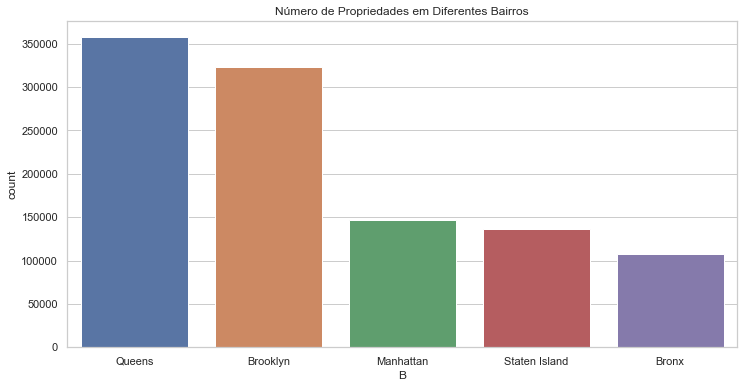

In [18]:
# Visualização da variável 2
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (12,6))
fig1 = sns.countplot(x  = 'B', data = dados, order = dados["B"].value_counts().index)
plt.title('Número de Propriedades em Diferentes Bairros')

#### 1.3.3. Variável: BLOCK

**Descrição**: Número de até 5 dígitos que representam códigos de bloco em diferentes bairros

In [19]:
# Contagem
block = df_cat["BLOCK"].value_counts().rename_axis("Números Únicos: Block").reset_index(name = "Quantidade")
block[:15]

,Números Únicos: Block,Quantidade
0,3944,3888
1,16,3786
2,3943,3424
3,3938,2794
4,1171,2535
5,3937,2275
6,1833,1774
7,2450,1651
8,1047,1480
9,7279,1302


#### 1.3.4. Variável: LOT

**Descrição**: Número de até 4 dígitos que representam códigos de lote em diferentes Borough & Block

In [20]:
lot = df_cat["LOT"].value_counts().rename_axis('Números Únicos: Block').reset_index(name = "Quantidade")[:15]
lot

,Números Únicos: Block,Quantidade
0,1,24367
1,20,12294
2,15,12171
3,12,12143
4,14,12074
5,16,12042
6,17,11982
7,18,11979
8,25,11949
9,21,11840


#### 1.3.5. Variável: EASEMENT

**Descrição**: Tipos de easement

Text(0.5, 1.0, 'Quantidade de Imóveis com Diversos Tipos de Easement')

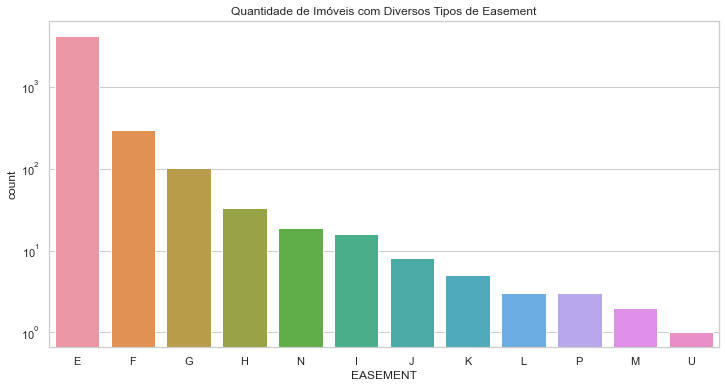

In [21]:
# Visualização da viariável EASEMENT
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12,6))
fig2 = sns.countplot(x = 'EASEMENT', data = dados, order = dados['EASEMENT'].value_counts().index)
fig2.set_yscale('log')
fig2.set_title('Quantidade de Imóveis com Diversos Tipos de Easement')

#### 1.3.6. Variável: OWNER

**Descrição**: Proprietários dos imóveis

In [22]:
# Contagem
OWNER = df_cat['OWNER'].value_counts().rename_axis('Números Únicos: Owner').reset_index(name = 'Quantidade')
OWNER.head()

,Números Únicos: Owner,Quantidade
0,PARKCHESTER PRESERVAT,6020
1,PARKS AND RECREATION,4255
2,DCAS,2169
3,HOUSING PRESERVATION,1904
4,CITY OF NEW YORK,1450


In [23]:
OWNER.tail()

,Números Únicos: Owner,Quantidade
863341,"MICHAEL J. SIECK, TRU",1
863342,KEVIN D CARNEY,1
863343,"ESCOFF, GINA",1
863344,JACOB & MARGUERITE HA,1
863345,"PASTRANA, ROBERT",1


#### 1.3.7. Variável: BLDGCL

**Descrição**: Classe do Imóvel

In [24]:
# Contagem
BLDGCL = df_cat["BLDGCL"].value_counts().rename_axis('Números Únicos: BLDGCL').reset_index(name = 'Quantidade')

In [25]:
BLDGCL.head()

,Números Únicos: BLDGCL,Quantidade
0,R4,139879
1,A1,123369
2,A5,96984
3,B1,84208
4,B2,77598


In [26]:
BLDGCL.tail()

,Números Únicos: BLDGCL,Quantidade
195,I2,4
196,I3,4
197,H7,3
198,E6,1
199,Y5,1


#### 1.3.8. Variável: TAXCLASS

**Descrição**: Código de classe de imposto de propriedade

Text(0.5, 1.0, 'Número de Propriedades com Vários Tipos de Classes')

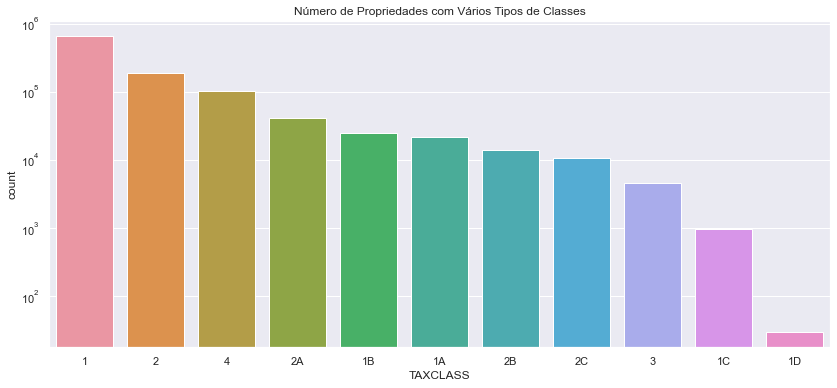

In [27]:
# Visualização da variável TAXCLASS
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (14,6))
fig3 = sns.countplot(x = 'TAXCLASS', data = dados, order = dados['TAXCLASS'].value_counts().index)
fig3.set_yscale('log')
fig3.set_title("Número de Propriedades com Vários Tipos de Classes")

#### 1.3.9. Variável: LTFRONT

**Descrição**: Frente do lote em pés (feet)

In [28]:
# Divide em percentis
dados["LTFRONT"].describe(percentiles = [0.5,0.75,0.999])

count   1070994.00
mean         36.64
std          74.03
min           0.00
50%          25.00
75%          40.00
99.9%       740.00
max        9999.00
Name: LTFRONT, dtype: float64

In [29]:
# Filtar por valores iguais ou menores que 375
tmp = dados[dados['LTFRONT'] <= 375]

Text(0.5, 1.0, 'Distribuição da Variável LTFRONT')

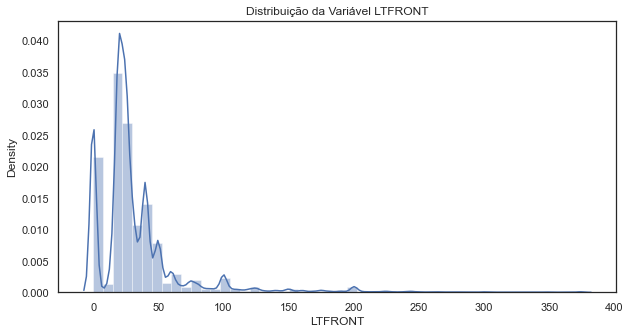

In [30]:
# Visualização da variável
sns.set_theme(style = 'white')
plt.figure(figsize = (10,5))
fig4 = sns.distplot(tmp.LTFRONT, bins = 50)
fig4.set_title('Distribuição da Variável LTFRONT')

#### 1.3.10. Variável: LTDEPTH

**Descrição**: Profundidade do lote em pés (feet)

In [31]:
# Divide em percentis
dados['LTDEPTH'].describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.9995])

count    1070994.00
mean          88.86
std           76.40
min            0.00
10%            0.00
20%           64.00
30%           90.00
40%          100.00
50%          100.00
60%          100.00
70%          100.00
80%          100.00
90%          116.00
95%          142.00
99.95%      1056.50
max         9999.00
Name: LTDEPTH, dtype: float64

In [32]:
# Filtra por valores iguais ou menores que 600
tmp = dados[dados['LTDEPTH'] <= 600]

Text(0.5, 1.0, 'Distribuição da Variável LTDEPTH')

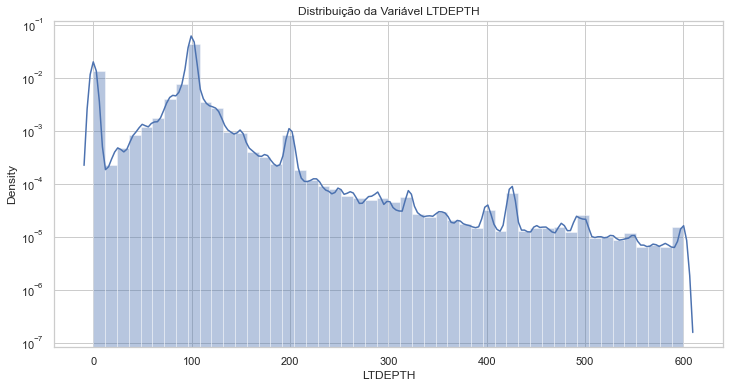

In [33]:
# Visualização da variável 10
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig5 = sns.distplot(tmp.LTDEPTH, bins = 50)
fig5.set_yscale("log")
fig5.set_title('Distribuição da Variável LTDEPTH')

#### 1.3.11. Variável: EXT

**Descrição**: E- Extension, G- Garage, EG- Extension e Garage

Text(0.5, 1.0, 'Número de Propriedade com Vários tipos de Extensões / Garagem')

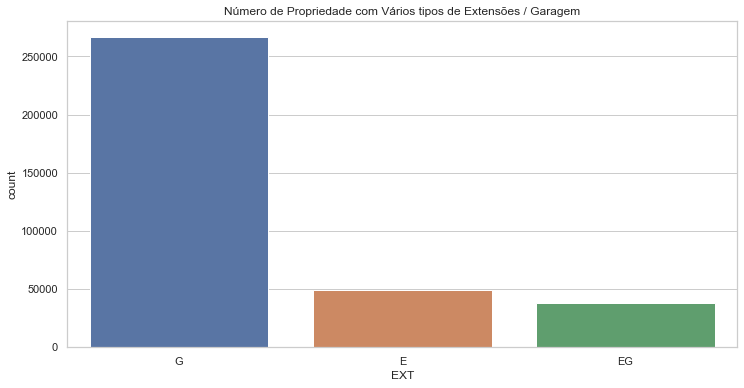

In [34]:
# Visualização da variável EXT
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12,6))
fig6 = sns.countplot(x = 'EXT', data = dados, order = dados['EXT'].value_counts().index)
fig6.set_title('Número de Propriedade com Vários tipos de Extensões / Garagem')

#### 1.3.12. Variável: STORIES

**Descrição**: Número de andares do edifício

In [35]:
# Divide em percentis
dados['STORIES'].describe(percentiles = [0.5,0.75,0.995])

count   1014730.00
mean          5.01
std           8.37
min           1.00
50%           2.00
75%           3.00
99.5%        50.00
max         119.00
Name: STORIES, dtype: float64

In [36]:
# Filtra 
tmp = dados[dados['STORIES'] <= 50]

Text(0.5, 1.0, 'Distribuição de Andares das Propriedades')

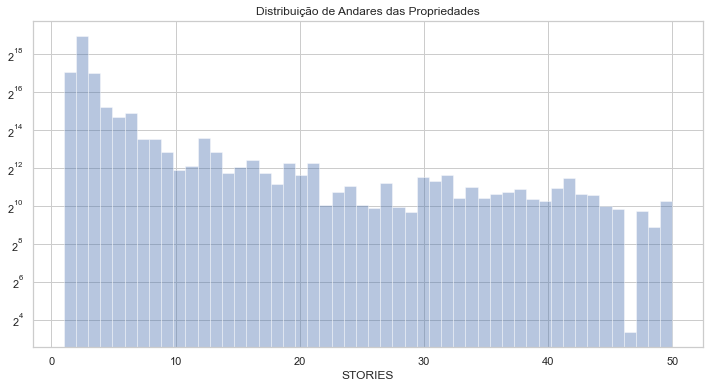

In [37]:
# Visualização da variável 12
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 6))
fig7 = sns.distplot(tmp['STORIES'], kde = False, bins = 50)
fig7.set_yscale('log', basey = 2)
fig7.set_title('Distribuição de Andares das Propriedades')

#### 1.3.13. Variável: FULLVAL

**Descrição**: Valor de Mercado Total

In [38]:
# Divide em percentis
dados['FULLVAL'].describe(percentiles = [0.5,0.75,0.95, 0.999])

count      1070994.00
mean        874264.51
std       11582430.99
min              0.00
50%         447000.00
75%         619000.00
95%        1530000.00
99.9%     58800700.00
max     6150000000.00
Name: FULLVAL, dtype: float64

In [39]:
# Visualiza os dados
dados['FULLVAL'].head()

RECORD
1    21400000.00
2   193800000.00
3   104686000.00
4    39200000.00
5   272300000.00
Name: FULLVAL, dtype: float64

In [40]:
# Filtra os dados para simplificar a visualização e evitar valores extremos
tmp = dados[dados['FULLVAL'] <= 3000000]

Text(0.5, 1.0, 'Distribuição do Valor de Mercado Total das Propriedades')

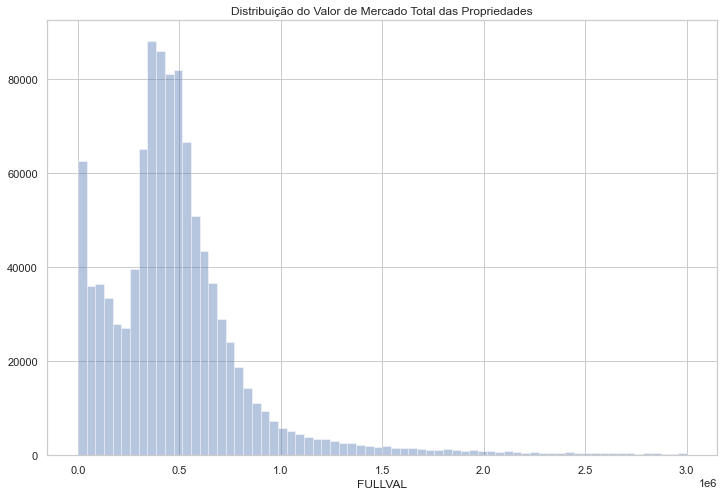

In [41]:
# Visualização da variável 13
dimensoes = (12, 8)
fig, ax = pyplot.subplots(figsize = dimensoes)
fig8 = sns.distplot(tmp.FULLVAL, kde = False, bins = 70)
fig8.set_title('Distribuição do Valor de Mercado Total das Propriedades')

#### 1.3.14. Variável: AVLAND

**Descrição**: Valor de mercado do terreno

In [42]:
# Divide em percentis
dados['AVLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         85067.92
std        4057260.06
min              0.00
50%          13678.00
75%          19740.00
95%         131388.75
max     2668500000.00
Name: AVLAND, dtype: float64

In [43]:
# Filtra os dados
tmp = dados[dados['AVLAND'] <= 50000]

Text(0.5, 1.0, 'Distribuição do Valor de Mercado do Terreno das Propriedades')

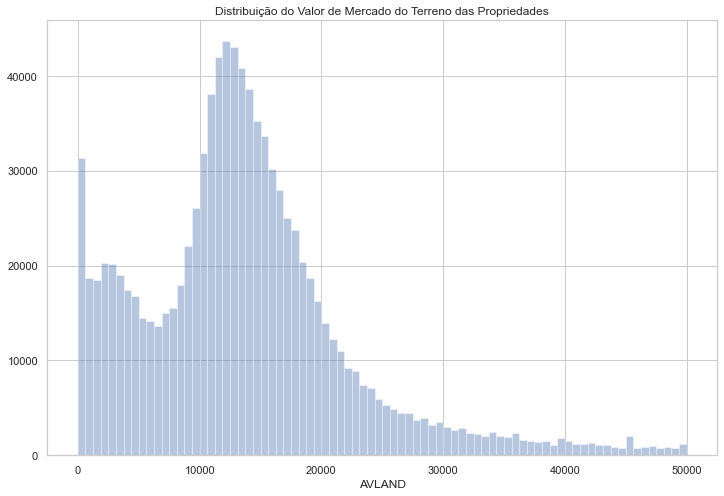

In [44]:
# Visualização da variável 14
dimensoes = (12, 8)
fig, ax = pyplot.subplots(figsize = dimensoes)
fig9 = sns.distplot(tmp.AVLAND, kde = False, bins = 80)
fig9.set_title('Distribuição do Valor de Mercado do Terreno das Propriedades')

#### 1.3.15. Variável: EXLAND

**Descrição**: Valor provisório do terreno isenção temporária

In [45]:
# Divide em percentis
dados['EXLAND'].describe(percentiles = [0.5,0.75,0.95])

count      1070994.00
mean         36423.89
std        3981575.79
min              0.00
50%           1620.00
75%           1620.00
95%          14489.00
max     2668500000.00
Name: EXLAND, dtype: float64

In [46]:
# Filtro
tmp = dados[dados['EXLAND'] <= 20000]

Text(0.5, 1.0, 'Valor Provisório do Terreno com Isenção Temporária')

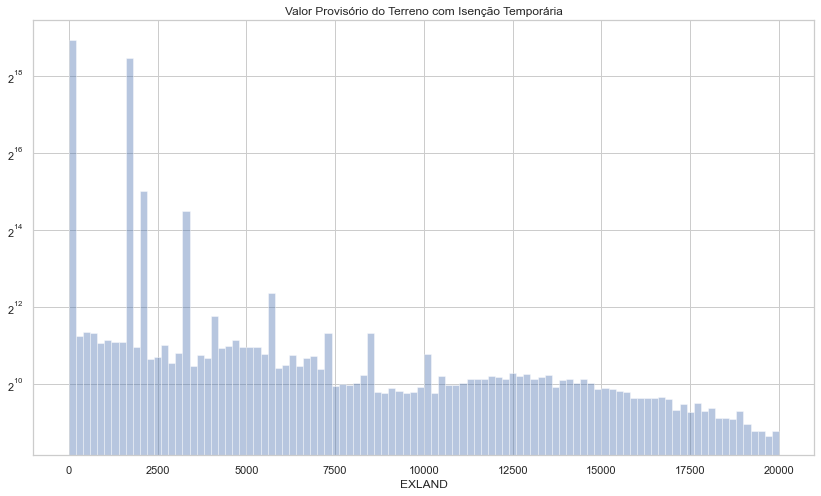

In [47]:
# Visualização da variável
dimensoes = (14, 8)
fig, ax = pyplot.subplots(figsize = dimensoes)
fig11 = sns.distplot(tmp.EXLAND, kde = False, bins = 100)
fig11.set_yscale('log', basey = 2)
fig11.set_title('Valor Provisório do Terreno com Isenção Temporária')


## 2. Modelagem

* Existem diversas técnicas para análise e detecção de fraude.
* Aplicaremos aqui uma abordagem via aprendizado não supervisionado criando scores (pontuações) de fraude para cada transação imobiliária.
* Serão criados 2 scores com técnicas diferentes de Machine Learning e depois vamos unir os scores e apresentar o score final.
* A Engenharia de Atributos será parte fundamental do processo.


In [48]:
# Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('dados/dataset.csv')

In [49]:
# Shape
df.shape

(1070994, 32)

In [50]:
df.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004.00,X3,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004.00,X3,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004.00,X1,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004.00,X1,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.00,272300000.00,121050000.00,122535000.00,121050000.00,122535000.00,2231.00,BATTERY PARK,10004.00,X1,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


In [51]:
# Vamos trabalhar com uma cópia do dataframe
df_temp = df.copy()

## 2.1. Limpeza e Transformação dos Dados

### 2.1.1. Limpando Valores Ausentes da Variável ZIP


In [52]:
# Contagem de valores ausentes
df_temp['ZIP'].isna().sum()

29890

In [53]:
# Vamos calcular o valor da variável zip que aparece com maior frequência (calcular a moda)
# Se não houver nenhum valor de moda, substitua por 1
def calcula_moda(x):
    m = pd.Series.mode(x)
    if m.empty:
        x = np.array(range(1,11))
        return x[0]
    else:
        return m.values[0]

In [54]:
# Definindo a função de contagem para calcular a frequência do valor da moda de cada grupo (que vamos definir)
def contagem(x):
    return x.value_counts().head(1)

In [55]:
# Agrupando valores pela variável 'B' e 'BLOCK' e usando as duas funções acima para criar dataframe auxiliar
# Teremos o valor da moda da variável ZIP para cada grupo com registros com as variáveis B e Block
df_zip_group = df_temp.groupby(['B','BLOCK'])['ZIP'].agg(ZIP = calcula_moda, Count = contagem).reset_index()

In [56]:
# Verificando os 25 primeiros registros
df_zip_group.head(25)

,B,BLOCK,ZIP,Count
0,1,1,10004.00,2
1,1,2,10004.00,2
2,1,3,10004.00,4
3,1,4,10004.00,53
4,1,5,10004.00,9
5,1,6,10004.00,2
6,1,7,10004.00,15
7,1,8,10004.00,6
8,1,9,10004.00,4
9,1,10,10004.00,8


In [57]:
# Para os grupos sem valor de moda, comparamos a frequência do grupo, um grupo abaixo e um grupo acima
# Inserimos o valor do ZIP do grupo com maior frequência
for i in range(len(df_zip_group)):
    if (df_zip_group.loc[i,'ZIP'] == 1):
        if df_zip_group.loc[i - 1,'Count'] > df_zip_group.loc[i + 1,'Count']:
            val = df_zip_group.loc[i - 1,'ZIP']
        else:
            val = df_zip_group.loc[i + 1,'ZIP']
        df_zip_group.loc[i,'ZIP'] = val

In [58]:
# Verificando os 25 primeiros registros
df_zip_group.head(25)

,B,BLOCK,ZIP,Count
0,1,1,10004.00,2
1,1,2,10004.00,2
2,1,3,10004.00,4
3,1,4,10004.00,53
4,1,5,10004.00,9
5,1,6,10004.00,2
6,1,7,10004.00,15
7,1,8,10004.00,6
8,1,9,10004.00,4
9,1,10,10004.00,8


In [59]:
# Definindo a função que preenche os registros com valor ZIP ausente por meio do dataframe auxiliar
def preenche_moda(x):
    if pd.isnull(x['ZIP']):
        return df_zip_group[(df_zip_group['B'] == x['B']) & (df_zip_group['BLOCK'] == x['BLOCK'])]['ZIP'].values[0]
    else:
        return x['ZIP']

In [60]:
# Usando a função para preencher os valores ZIP ausentes
df_temp['ZIP'] = df_temp.apply(preenche_moda, axis = 1)

In [61]:
# Verificando se há algum valor ZIP restante com valor NA
print('Quantidade de valores missing: ',df_temp['ZIP'].isna().sum())

Quantidade de valores missing:  0


In [62]:
# Verificando manualmente uma das ocorrências para checar se a fórmula funcionou corretamente
df_temp[(df_temp['B']=='Manhattan') & (df_temp['BLOCK']==36)]['ZIP']

Series([], Name: ZIP, dtype: float64)

In [63]:
# Visualiza
df_temp.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004.00,X3,0,0,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004.00,X3,0,0,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004.00,X1,709,564,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004.00,X1,85,551,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.00,272300000.00,121050000.00,122535000.00,121050000.00,122535000.00,2231.00,BATTERY PARK,10004.00,X1,89,57,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR


In [64]:
# Vamos salvar o dataframe resultante em disco
df_temp.to_csv('dados/dataset_zip_limpo.csv')

In [65]:
df_temp['ZIP'] = df_temp['ZIP'].astype(int).astype(str)

In [66]:
# Cria cópia da estrutura do dataframe
df_temp2 = df_temp.copy()

In [67]:
# Carrega os dados do disco
df_temp2 = pd.read_csv('dados/dataset_zip_limpo.csv')

### 2.1.2. Limpando Valores Ausentes da Variável:

FULLVAL, AVLAND, AVTOT, BLDFRONT, BLDDEPTH, LTFRONT e LTDEPTH


In [68]:
# Substituindo valores vazios por valores NaN para garantir que a função fillna funcione nas etapas posteriores
df_temp2.replace(0, np.nan, inplace = True)

In [69]:
# Definindo a lista de variáveis a serem preenchidas
list_fill = ['FULLVAL', 'AVLAND', 'AVTOT', 'BLDFRONT', 'BLDDEPTH', 'LTFRONT', 'LTDEPTH']

In [70]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, '--> Número de valores ausentes: ', df_temp2[i].isna().sum(),'\n')

FULLVAL --> Número de valores ausentes:  13007 

AVLAND --> Número de valores ausentes:  13009 

AVTOT --> Número de valores ausentes:  13007 

BLDFRONT --> Número de valores ausentes:  228815 

BLDDEPTH --> Número de valores ausentes:  228853 

LTFRONT --> Número de valores ausentes:  169108 

LTDEPTH --> Número de valores ausentes:  170128 



In [71]:
# Preenchendo os registros vazios com a mediana do grupo ZIP e BLDGCL se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['ZIP','BLDGCL'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [72]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum()," ↘\n")

FULLVAL --> Número de valores ausentes: 10294  ↘

AVLAND --> Número de valores ausentes: 10294  ↘

AVTOT --> Número de valores ausentes: 10294  ↘

BLDFRONT --> Número de valores ausentes: 75202  ↘

BLDDEPTH --> Número de valores ausentes: 75218  ↘

LTFRONT --> Número de valores ausentes: 16025  ↘

LTDEPTH --> Número de valores ausentes: 17764  ↘



In [73]:
# Preenchendo os registros vazios com a mediana do grupo ZIP e TAXCLASS se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['ZIP','TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [74]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum()," ↘\n")

FULLVAL --> Número de valores ausentes: 3915  ↘

AVLAND --> Número de valores ausentes: 3915  ↘

AVTOT --> Número de valores ausentes: 3915  ↘

BLDFRONT --> Número de valores ausentes: 31226  ↘

BLDDEPTH --> Número de valores ausentes: 31130  ↘

LTFRONT --> Número de valores ausentes: 3092  ↘

LTDEPTH --> Número de valores ausentes: 3146  ↘



In [75]:
# Preenchendo os registros ausentes com a mediana do grupo B e TAXCLASS se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['B','TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [76]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum()," ↘\n")

FULLVAL --> Número de valores ausentes: 678  ↘

AVLAND --> Número de valores ausentes: 678  ↘

AVTOT --> Número de valores ausentes: 678  ↘

BLDFRONT --> Número de valores ausentes: 22317  ↘

BLDDEPTH --> Número de valores ausentes: 18831  ↘

LTFRONT --> Número de valores ausentes: 2  ↘

LTDEPTH --> Número de valores ausentes: 2  ↘



In [77]:
# Preenchendo os registros ausentes com a mediana do grupo B se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    df_temp2[i] = df_temp2.groupby(['B'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [78]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum(),"\n")

FULLVAL --> Número de valores ausentes: 0 

AVLAND --> Número de valores ausentes: 0 

AVTOT --> Número de valores ausentes: 0 

BLDFRONT --> Número de valores ausentes: 0 

BLDDEPTH --> Número de valores ausentes: 0 

LTFRONT --> Número de valores ausentes: 0 

LTDEPTH --> Número de valores ausentes: 0 



### 2.1.3. Limpando Valores Ausentes da Variável: STORIES


In [79]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 56264


In [80]:
# Imputação da mediana com base nos grupos de ZIP e BLDGCL
df_temp2['STORIES'] = df_temp2.groupby(['ZIP','BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [81]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 42102


In [82]:
# Imputação da mediana com base nos grupos de BLDGCL e STORIES
df_temp2['STORIES'] = df_temp2.groupby(['BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [83]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 4280


In [84]:
# Imputação da mediana com base nos grupos de TAXCLASS e STORIES
df_temp2['STORIES'] = df_temp2.groupby(['TAXCLASS'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)

In [85]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 0


In [86]:
# Salvando resultado em disco
df_temp2.to_csv('dados/dataset_variaveis_limpo.csv')


## 3. Engenharia de Atributos

Vamos criar algumas variáveis a partir de operações com as variáveis existentes

In [87]:
# Cópia do dataframe
df_proc = df_temp2.copy()

In [88]:
# LTFRONT * LTDEPTH
df_proc['AREA1'] = df_proc['LTFRONT'] * df_proc['LTDEPTH']

In [89]:
# Visualiza amosta
df_proc[['AREA1', 'LTFRONT', 'LTDEPTH']].head()

,AREA1,LTFRONT,LTDEPTH
0,523000.00,500.00,1046.00
1,9585.00,27.00,355.00
2,399876.00,709.00,564.00
3,436943.00,793.00,551.00
4,406980.00,323.00,1260.00


In [90]:
# BLDFRONT * BLDDEPTH
df_proc['AREA2'] = df_proc['BLDFRONT'] * df_proc['BLDDEPTH']

In [91]:
# Visualiza amostra
df_proc[['AREA2', 'BLDFRONT', 'BLDDEPTH']].head()

,AREA2,BLDFRONT,BLDDEPTH
0,121476.00,382.00,318.00
1,121476.00,382.00,318.00
2,399876.00,709.00,564.00
3,46835.00,85.00,551.00
4,5073.00,89.00,57.00


In [92]:
# AREA2 * STORIES
df_proc['AREA3'] = df_proc['AREA2'] * df_proc['STORIES']

In [93]:
# Visualiza amostra
df_proc[['AREA2', 'STORIES', 'AREA3']].head()

,AREA2,STORIES,AREA3
0,121476.00,4.00,485904.00
1,121476.00,1.00,121476.00
2,399876.00,3.00,1199628.00
3,46835.00,2.00,93670.00
4,5073.00,1.00,5073.00


In [94]:
# Dividindo FULLVAL, AVLAND e AVTOT pelas variáveis recém criadas AREA1, AREA2 e AREA3 para gerar um índice
k = 1
for i in ['FULLVAL', 'AVLAND', 'AVTOT']:
    for j in ['AREA1', 'AREA2', 'AREA3']:
        indice_area = 'ind' + str(k)
        df_proc[indice_area] = df_proc[i] / df_proc[j]
        print(indice_area + ' é a combinação feita entre:', i, j)
        k += 1

ind1 é a combinação feita entre: FULLVAL AREA1
ind2 é a combinação feita entre: FULLVAL AREA2
ind3 é a combinação feita entre: FULLVAL AREA3
ind4 é a combinação feita entre: AVLAND AREA1
ind5 é a combinação feita entre: AVLAND AREA2
ind6 é a combinação feita entre: AVLAND AREA3
ind7 é a combinação feita entre: AVTOT AREA1
ind8 é a combinação feita entre: AVTOT AREA2
ind9 é a combinação feita entre: AVTOT AREA3


In [95]:
# Visualiza amostra
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.00,1046.00,NaN,4.00,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004.00,X3,382.00,318.00,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,523000.00,121476.00,485904.00,40.92,176.17,44.04,8.08,34.78,8.70,18.41,79.27,19.82
1,1.00,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.00,355.00,NaN,1.00,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004.00,X3,382.00,318.00,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,9585.00,121476.00,121476.00,20219.09,1595.38,1595.38,1492.96,117.80,117.80,9098.59,717.92,717.92
2,2.00,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.00,564.00,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004.00,X1,709.00,564.00,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,399876.00,399876.00,1199628.00,261.80,261.80,87.27,97.55,97.55,32.52,117.81,117.81,39.27
3,3.00,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.00,551.00,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004.00,X1,85.00,551.00,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR,436943.00,46835.00,93670.00,89.71,836.98,418.49,34.91,325.72,162.86,40.37,376.64,188.32
4,4.00,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.00,1260.00,NaN,1.00,272300000.00,121050000.00,122535000.00,121050000.00,122535000.00,2231.00,BATTERY PARK,10004.00,X1,89.00,57.00,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR,406980.00,5073.00,5073.00,669.07,53676.33,53676.33,297.43,23861.62,23861.62,301.08,24154.35,24154.35


In [96]:
df_proc['ZIP'].dtype

dtype('float64')

In [97]:
# Converte o tipo da variável zip para string
df_proc['ZIP'] = df_proc['ZIP'].astype(int).astype(str)

In [98]:
df_proc['ZIP'].dtype

dtype('O')

In [99]:
# Lista das variáveis para o agrupamento abaixo
list_groupby = ['ZIP', 'TAXCLASS', 'B']

In [100]:
# Cria variáveis que representam as médias das áreas dos imóveis por grupo com base no índice criado

# Lista
ind_lista = ['ind' + str(i) for i in range(1,10)]

# Loop
for i in list_groupby:
    for j in ind_lista:
        name_col = 'media_' + str(j) + '_grupo_' + str(i)
        df_proc[name_col] = df_proc.groupby(i)[j].transform('mean')
        name_col_final = str(j) + '_' + name_col
        df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

In [101]:
# Visualiza
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,media_ind1_grupo_ZIP,ind1_media_ind1_grupo_ZIP,media_ind2_grupo_ZIP,ind2_media_ind2_grupo_ZIP,media_ind3_grupo_ZIP,ind3_media_ind3_grupo_ZIP,media_ind4_grupo_ZIP,ind4_media_ind4_grupo_ZIP,media_ind5_grupo_ZIP,ind5_media_ind5_grupo_ZIP,media_ind6_grupo_ZIP,ind6_media_ind6_grupo_ZIP,media_ind7_grupo_ZIP,ind7_media_ind7_grupo_ZIP,media_ind8_grupo_ZIP,ind8_media_ind8_grupo_ZIP,media_ind9_grupo_ZIP,ind9_media_ind9_grupo_ZIP,media_ind1_grupo_TAXCLASS,ind1_media_ind1_grupo_TAXCLASS,media_ind2_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,media_ind3_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,media_ind4_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,media_ind5_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,media_ind6_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,media_ind7_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,media_ind8_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,media_ind9_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,media_ind1_grupo_B,ind1_media_ind1_grupo_B,media_ind2_grupo_B,ind2_media_ind2_grupo_B,media_ind3_grupo_B,ind3_media_ind3_grupo_B,media_ind4_grupo_B,ind4_media_ind4_grupo_B,media_ind5_grupo_B,ind5_media_ind5_grupo_B,media_ind6_grupo_B,ind6_media_ind6_grupo_B,media_ind7_grupo_B,ind7_media_ind7_grupo_B,media_ind8_grupo_B,ind8_media_ind8_grupo_B,media_ind9_grupo_B,ind9_media_ind9_grupo_B
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.00,1046.00,NaN,4.00,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004,X3,382.00,318.00,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,523000.00,121476.00,485904.00,40.92,176.17,44.04,8.08,34.78,8.70,18.41,79.27,19.82,308.57,0.13,399.54,0.44,136.60,0.32,43.91,0.18,90.43,0.38,52.26,0.17,126.02,0.15,166.97,0.47,58.52,0.34,219.17,0.19,861.40,0.20,449.72,0.10,39.66,0.20,274.58,0.13,163.84,0.05,98.70,0.19,408.04,0.19,209.16,0.09,363.95,0.11,554.92,0.32,162.78,0.27,35.93,0.22,67.91,0.51,31.91,0.27,95.55,0.19,146.19,0.54,45.06,0.44
1,1.00,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.00,355.00,NaN,1.00,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004,X3,382.00,318.00,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,9585.00,121476.00,121476.00,20219.09,1595.38,1595.38,1492.96,117.80,117.80,9098.59,717.92,717.92,308.57,65.53,399.54,3.99,136.60,11.68,43.91,34.00,90.43,1.30,52.26,2.25,126.02,72.20,166.97,4.30,58.52,12.27,219.17,92.25,861.40,1.85,449.72,3.55,39.66,37.65,274.58,0.43,163.84,0.72,98.70,92.19,408.04,1.76,209.16,3.43,363.95,55.55,554.92,2.87,162.78,9.80,35.93,41.55,67.91,1.73,31.91,3.69,95.55,95.23,146.19,4.91,45.06,15.93
2,2.00,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.00,564.00,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004,X1,709.00,564.00,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,399876.00,399876.00,1199628.00,261.80,261.80,87.27,97.55,97.55,32.52,117.81,117.81,39.27,308.57,0.85,399.54,0.66,136.60,0.64,43.91,2.22,90.43,1.08,52.26,0.62,126.02,0.93,166.97,0.71,58.52,0.67,219.17,1.19,861.40,0.30,449.72,0.19,39.66,2.46,274.58,0.36,163.84,0.20,98.70,1.19,408.04,0.29,209.16,0.19,363.95,0.72,554.92,0.47,162.78,0.54,35.93,2.72,67.91,1.44,31.91,1.02,95.55,1.23,146.19,0.81,45.06,0.87
3,3.00,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.00,551.00,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004,X1,85.00,551.00,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR,436943.00,46835.00,93670.00,89.71,836.98,418.49,34.91,325.72,162.86,40.37,376.64,188.32,308.57,0.29,399.54,2.09,136.60,3.06,43.91,0.80,90.43,3.6

In [102]:
# Shape
df_proc.shape

(1070994, 99)

In [103]:
# Média para todas as variáveis
for j in ind_lista:
    name_col = 'media_' + str(j) + '_grupo_All'
    df_proc[name_col] = df_proc[j].mean()
    name_col_final = str(j) + '_' + name_col
    df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

In [104]:
# Shape
df_proc.shape

(1070994, 117)

In [105]:
# Visualiza
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,media_ind1_grupo_ZIP,ind1_media_ind1_grupo_ZIP,media_ind2_grupo_ZIP,ind2_media_ind2_grupo_ZIP,media_ind3_grupo_ZIP,ind3_media_ind3_grupo_ZIP,media_ind4_grupo_ZIP,ind4_media_ind4_grupo_ZIP,media_ind5_grupo_ZIP,ind5_media_ind5_grupo_ZIP,media_ind6_grupo_ZIP,ind6_media_ind6_grupo_ZIP,media_ind7_grupo_ZIP,ind7_media_ind7_grupo_ZIP,media_ind8_grupo_ZIP,ind8_media_ind8_grupo_ZIP,media_ind9_grupo_ZIP,ind9_media_ind9_grupo_ZIP,media_ind1_grupo_TAXCLASS,ind1_media_ind1_grupo_TAXCLASS,media_ind2_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,media_ind3_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,media_ind4_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,media_ind5_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,media_ind6_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,media_ind7_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,media_ind8_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,media_ind9_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,media_ind1_grupo_B,ind1_media_ind1_grupo_B,media_ind2_grupo_B,ind2_media_ind2_grupo_B,media_ind3_grupo_B,ind3_media_ind3_grupo_B,media_ind4_grupo_B,ind4_media_ind4_grupo_B,media_ind5_grupo_B,ind5_media_ind5_grupo_B,media_ind6_grupo_B,ind6_media_ind6_grupo_B,media_ind7_grupo_B,ind7_media_ind7_grupo_B,media_ind8_grupo_B,ind8_media_ind8_grupo_B,media_ind9_grupo_B,ind9_media_ind9_grupo_B,media_ind1_grupo_All,ind1_media_ind1_grupo_All,media_ind2_grupo_All,ind2_media_ind2_grupo_All,media_ind3_grupo_All,ind3_media_ind3_grupo_All,media_ind4_grupo_All,ind4_media_ind4_grupo_All,media_ind5_grupo_All,ind5_media_ind5_grupo_All,media_ind6_grupo_All,ind6_media_ind6_grupo_All,media_ind7_grupo_All,ind7_media_ind7_grupo_All,media_ind8_grupo_All,ind8_media_ind8_grupo_All,media_ind9_grupo_All,ind9_media_ind9_grupo_All
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.00,1046.00,NaN,4.00,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004,X3,382.00,318.00,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,523000.00,121476.00,485904.00,40.92,176.17,44.04,8.08,34.78,8.70,18.41,79.27,19.82,308.57,0.13,399.54,0.44,136.60,0.32,43.91,0.18,90.43,0.38,52.26,0.17,126.02,0.15,166.97,0.47,58.52,0.34,219.17,0.19,861.40,0.20,449.72,0.10,39.66,0.20,274.58,0.13,163.84,0.05,98.70,0.19,408.04,0.19,209.16,0.09,363.95,0.11,554.92,0.32,162.78,0.27,35.93,0.22,67.91,0.51,31.91,0.27,95.55,0.19,146.19,0.54,45.06,0.44,343.74,0.12,607.28,0.29,283.67,0.16,11.09,0.73,44.11,0.79,23.91,0.36,30.66,0.60,75.64,1.05,34.43,0.58
1,1.00,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.00,355.00,NaN,1.00,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004,X3,382.00,318.00,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,9585.00,121476.00,121476.00,20219.09,1595.38,1595.38,1492.96,117.80,117.80,9098.59,717.92,717.92,308.57,65.53,399.54,3.99,136.60,11.68,43.91,34.00,90.43,1.30,52.26,2.25,126.02,72.20,166.97,4.30,58.52,12.27,219.17,92.25,861.40,1.85,449.72,3.55,39.66,37.65,274.58,0.43,163.84,0.72,98.70,92.19,408.04,1.76,209.16,3.43,363.95,55.55,554.92,2.87,162.78,9.80,35.93,41.55,67.91,1.73,31.91,3.69,95.55,95.23,146.19,4.91,45.06,15.93,343.74,58.82,607.28,2.63,283.67,5.62,11.09,134.57,44.11,2.67,23.91,4.93,30.66,296.77,75.64,9.49,34.43,20.85
2,2.00,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.00,564.00,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004,X1,709.00,564.00,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,399876.00,399876.00,1199628.00,261.80,261.80,87.27,97.55,97.55,32.52,117.81,117.81,39.27,308.57,0.85,399.54,0.66,136.60,0.64,43.91,2.22,90.43,1.08,52.26,0.62,126.0

In [106]:
# Lista para as colunas criadas
cols_created = []

In [107]:
# Loop pelas variáveis do group by
for i in list_groupby:
    for j in ind_lista:
        cols_created.append(j + '_media_' + j + '_grupo_' + i)

In [108]:
len(cols_created)

27

In [109]:
# Loop pelas colunas criadas
for j in ind_lista:
    cols_created.append(j + '_media_' + j + '_grupo_All')

In [110]:
len(cols_created)

36

In [111]:
# Colunas finais para os dados
cols = list(df.columns) + cols_created

In [112]:
# Dataframe final
df_final = df_proc[cols]

In [113]:
# Shape
df_final.shape

(1070994, 68)

As variáveis ajudam a verificar quão "normal" é cada registro

In [114]:
# Colunas
df_final.columns

Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'ind1_media_ind1_grupo_ZIP',
       'ind2_media_ind2_grupo_ZIP', 'ind3_media_ind3_grupo_ZIP',
       'ind4_media_ind4_grupo_ZIP', 'ind5_media_ind5_grupo_ZIP',
       'ind6_media_ind6_grupo_ZIP', 'ind7_media_ind7_grupo_ZIP',
       'ind8_media_ind8_grupo_ZIP', 'ind9_media_ind9_grupo_ZIP',
       'ind1_media_ind1_grupo_TAXCLASS', 'ind2_media_ind2_grupo_TAXCLASS',
       'ind3_media_ind3_grupo_TAXCLASS', 'ind4_media_ind4_grupo_TAXCLASS',
       'ind5_media_ind5_grupo_TAXCLASS', 'ind6_media_ind6_grupo_TAXCLASS',
       'ind7_media_ind7_grupo_TAXCLASS', 'ind8_media_ind8_grupo_TAXCLASS',
       'ind9_media_ind9_grupo_TAXCLASS', 'ind1_media_ind1_grupo_

In [115]:
# Visualiza
df_final.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.00,1046.00,NaN,4.00,21400000.00,4225500.00,9630000.00,4225500.00,9630000.00,4600.00,1 LIBERTY ISLAND,10004,X3,382.00,318.00,3775500.00,8613000.00,3775500.00,8613000.00,NaN,FINAL,2010/11,AC-TR,0.13,0.44,0.32,0.18,0.38,0.17,0.15,0.47,0.34,0.19,0.20,0.10,0.20,0.13,0.05,0.19,0.19,0.09,0.11,0.32,0.27,0.22,0.51,0.27,0.19,0.54,0.44,0.12,0.29,0.16,0.73,0.79,0.36,0.60,1.05,0.58
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.00,355.00,NaN,1.00,193800000.00,14310000.00,87210000.00,14310000.00,87210000.00,4600.00,1 ELLIS ISLAND,10004,X3,382.00,318.00,11111400.00,80690400.00,11111400.00,80690400.00,NaN,FINAL,2010/11,AC-TR,65.53,3.99,11.68,34.00,1.30,2.25,72.20,4.30,12.27,92.25,1.85,3.55,37.65,0.43,0.72,92.19,1.76,3.43,55.55,2.87,9.80,41.55,1.73,3.69,95.23,4.91,15.93,58.82,2.63,5.62,134.57,2.67,4.93,296.77,9.49,20.85
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.00,564.00,E,3.00,104686000.00,39008700.00,47108700.00,39008700.00,47108700.00,2191.00,MARGINAL STREET,10004,X1,709.00,564.00,32321790.00,40179510.00,32321790.00,40179510.00,NaN,FINAL,2010/11,AC-TR,0.85,0.66,0.64,2.22,1.08,0.62,0.93,0.71,0.67,1.19,0.30,0.19,2.46,0.36,0.20,1.19,0.29,0.19,0.72,0.47,0.54,2.72,1.44,1.02,1.23,0.81,0.87,0.76,0.43,0.31,8.79,2.21,1.36,3.84,1.56,1.14
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.00,551.00,NaN,2.00,39200000.00,15255000.00,17640000.00,15255000.00,17640000.00,2191.00,PIER 6,10004,X1,85.00,551.00,13644000.00,15750000.00,13644000.00,15750000.00,NaN,FINAL,2010/11,AC-TR,0.29,2.09,3.06,0.80,3.60,3.12,0.32,2.26,3.22,0.41,0.97,0.93,0.88,1.19,0.99,0.41,0.92,0.90,0.25,1.51,2.57,0.97,4.80,5.10,0.42,2.58,4.18,0.26,1.38,1.48,3.15,7.38,6.81,1.32,4.98,5.47
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.00,1260.00,NaN,1.00,272300000.00,121050000.00,122535000.00,121050000.00,122535000.00,2231.00,BATTERY PARK,10004,X1,89.00,57.00,106348680.00,107758350.00,106348680.00,107758350.00,NaN,FINAL,2010/11,AC-TR,2.17,134.34,392.95,6.77,263.88,456.56,2.39,144.67,412.75,3.05,62.31,119.36,7.50,86.90,145.64,3.05,59.20,115.48,1.84,96.73,329.74,8.28,351.36,747.86,3.15,165.23,536.03,1.95,88.39,189.22,26.81,540.93,997.87,9.82,319.35,701.54


In [116]:
# Salva em disco
df_final.to_csv('dados/dataset_final.csv')

In [117]:
# Carrega do disco
df_final = pd.read_csv('dados/dataset_final.csv')

In [118]:
# Dataframe final para a modelagem
df = df_final.copy()


### 3.1. Calculando o Score de Fraude 1 com PCA

Vamos criar o score de fraude usando PCA em escala Z. Essa é uma abordagem de aprendizado não supervisionado.

In [182]:
# Imports
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
pd.set_option('display.float_format', lambda x : '%.6f' % x)


In [120]:
# Buscaa as 36 últimas culnas (com as variáveis que nós criamos na Engenharia de Atributos)
df.iloc[:,-36:].columns

Index(['ind1_media_ind1_grupo_ZIP', 'ind2_media_ind2_grupo_ZIP',
       'ind3_media_ind3_grupo_ZIP', 'ind4_media_ind4_grupo_ZIP',
       'ind5_media_ind5_grupo_ZIP', 'ind6_media_ind6_grupo_ZIP',
       'ind7_media_ind7_grupo_ZIP', 'ind8_media_ind8_grupo_ZIP',
       'ind9_media_ind9_grupo_ZIP', 'ind1_media_ind1_grupo_TAXCLASS',
       'ind2_media_ind2_grupo_TAXCLASS', 'ind3_media_ind3_grupo_TAXCLASS',
       'ind4_media_ind4_grupo_TAXCLASS', 'ind5_media_ind5_grupo_TAXCLASS',
       'ind6_media_ind6_grupo_TAXCLASS', 'ind7_media_ind7_grupo_TAXCLASS',
       'ind8_media_ind8_grupo_TAXCLASS', 'ind9_media_ind9_grupo_TAXCLASS',
       'ind1_media_ind1_grupo_B', 'ind2_media_ind2_grupo_B',
       'ind3_media_ind3_grupo_B', 'ind4_media_ind4_grupo_B',
       'ind5_media_ind5_grupo_B', 'ind6_media_ind6_grupo_B',
       'ind7_media_ind7_grupo_B', 'ind8_media_ind8_grupo_B',
       'ind9_media_ind9_grupo_B', 'ind1_media_ind1_grupo_All',
       'ind2_media_ind2_grupo_All', 'ind3_media_ind3_grupo_All'

In [121]:
# Cria o objeto scaler
scaler = preprocessing.StandardScaler()

In [122]:
#  Aplica o scaler às variáveis
arr_scaled = scaler.fit_transform(df.iloc[:,-36:])

In [123]:
# Cria o dataframe
df_scaled = pd.DataFrame(arr_scaled, columns = cols_created)

In [124]:
# Visualiza a amostra
df_scaled.head()

,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All
0,-0.217642,-0.058083,-0.061874,-0.063673,-0.024200,-0.031534,-0.087295,-0.024959,-0.029884,-0.141901,-0.032287,-0.010859,-0.098582,-0.014261,-0.006837,-0.118500,-0.031582,-0.010875,-0.060567,-0.046552,-0.041157,-0.033691,-0.006001,-0.009110,-0.054825,-0.007588,-0.009502,-0.040192,-0.045643,-0.049198,-0.012697,-0.002692,-0.007698,-0.030665,0.000833,-0.006849
1,16.190473,0.310943,0.975171,2.574879,0.011906,0.047434,7.279154,0.156815,0.509155,15.921190,0.034584,0.030668,4.537038,-0.009324,-0.002029,13.283676,0.029767,0.029220,3.722748,0.127880,0.496549,1.762530,0.009037,0.033714,6.399266,0.064835,0.253274,2.637975,0.104614,0.269305,6.240320,0.021270,0.047501,22.708403,0.147039,0.320354
2,-0.038033,-0.035817,-0.032979,0.095315,0.003099,-0.014292,-0.006659,-0.013991,-0.014865,0.033932,-0.028252,-0.009702,0.180741,-0.010528,-0.005787,0.028206,-0.027880,-0.009758,-0.019153,-0.036028,-0.026175,0.074542,0.005369,0.000240,0.015824,-0.003218,-0.002180,-0.010875,-0.036577,-0.040324,0.364084,0.015425,0.004353,0.218246,0.009655,0.002268
3,-0.177963,0.113743,0.188440,-0.015991,0.102335,0.080045,-0.069481,0.059679,0.100225,-0.103056,-0.001151,-0.000836,-0.014811,0.003042,-0.000043,-0.086090,-0.003016,-0.001197,-0.051418,0.034667,0.088630,-0.001231,0.046701,0.051399,-0.039217,0.026134,0.053925,-0.033715,0.024320,0.027680,0.100303,0.081283,0.070297,0.024324,0.068910,0.072129
4,0.293151,13.853133,35.790522,0.450496,10.338813,17.232588,0.142026,6.827386,18.605602,0.358152,2.488535,1.424803,0.804752,1.402810,1.044369,0.298717,2.281088,1.375258,0.057209,6.529051,18.548245,0.316335,4.310177,9.353199,0.146094,2.722560,9.075113,0.043181,5.618616,10.961996,1.205816,6.874744,12.060259,0.677213,5.512374,11.305086


### 3.1.1. Aplicando PCA

In [125]:
# Cria e treina o modelo PCA
# Queremos encontrar o valor ideal de componentes principais
pca = PCA().fit(df_scaled)

<Figure size 432x288 with 0 Axes>

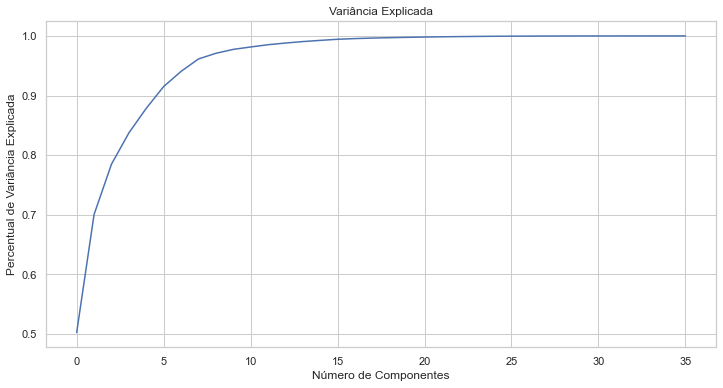

In [126]:
# Visualiza a Soma Cumulativa da Viriância Explicada
plt.figure()
plt.figure(figsize = (12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada')
plt.show()

In [127]:
# Pelo gráfico acima 10 componentes principais são suficientes. Usaremos esse valor 
pca = PCA(n_components = 10)

In [128]:
# Fit e transform do modelo pca
arr_pca = pca.fit_transform(df_scaled)

In [129]:
# Cria a lista colunas do PCA
cols_PCA = ['PCA' + str(i) for i in range(1,11)]
cols_PCA

['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10']

In [130]:
# Armasena os componentes em um dataframe
df_scaled_pca = pd.DataFrame(arr_pca, columns = cols_PCA)

# Visualiza amostra
df_scaled_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.189786,-0.225928,-0.070251,-0.061773,0.068859,-0.138118,0.036129,-0.006097,0.054610,-0.030596
1,9.243828,28.165459,9.693018,2.014850,-3.490405,6.142835,0.500528,0.333165,9.767015,1.717751
2,0.037149,0.276740,0.007367,0.076539,0.023640,-0.144762,-0.026214,0.050815,0.322028,-0.075613
3,0.224525,-0.182780,-0.168560,-0.105874,-0.069198,-0.069884,-0.085056,-0.009260,0.131555,-0.037318
4,43.391792,-9.788772,-11.472998,-9.508949,-21.790186,4.601164,-14.752986,-10.398443,1.856955,4.854454


### 3.1.2 Aplicação da Escala Z em Componentes PCA Padronizados

In [131]:
# Fit e transform nos dados
arr_pca_scaled_z = scaler.fit_transform(df_scaled_pca)

In [132]:
# Cria o dataFrame
df_pca_scaled_z = pd.DataFrame(arr_pca_scaled_z, columns = cols_PCA)

# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093356,-0.062923
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523599,0.384417,16.696565,3.532632
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155501
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224891,-0.076746
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998071,3.174437,9.983402


### 3.1.3 Calculando o Fraud Score

In [133]:
# Loop para calcular o score por componente PCA
for i in range(1,11):
    col_name = 'score' + str(i)
    pca_col_name = 'PCA' + str(i)
    df_pca_scaled_z[col_name] = df_pca_scaled_z[pca_col_name] ** 2 

In [134]:
# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093356,-0.062923,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523599,0.384417,16.696565,3.532632,4.721539,111.367812,30.968961,2.151928,8.188489,28.722445,0.274156,0.147776,278.775287,12.479486
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155501,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224891,-0.076746,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005890
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998071,3.174437,9.983402,104.038733,13.451864,43.387278,47.930008,319.134642,16.114584,238.177403,143.953715,10.077047,99.668315


In [135]:
# Colunas
col_scores = ['score' + str(i) for i in range(1,11)]

In [136]:
# Calcula o score de fraude
df_pca_scaled_z['Fraud Score 1'] = df_pca_scaled_z[col_scores].sum(axis = 1) ** (1 / 2)

# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,Fraud Score 1
0,-0.044612,-0.084651,-0.040333,-0.044975,0.056453,-0.120501,0.037794,-0.007035,0.093356,-0.062923,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959,0.211342
1,2.172910,10.553095,5.564976,1.466945,-2.861554,5.359333,0.523599,0.384417,16.696565,3.532632,4.721539,111.367812,30.968961,2.151928,8.188489,28.722445,0.274156,0.147776,278.775287,12.479486,21.858588
2,0.008733,0.103690,0.004230,0.055726,0.019381,-0.126298,-0.027422,0.058632,0.550502,-0.155501,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181,0.601415
3,0.052778,-0.068484,-0.096774,-0.077083,-0.056731,-0.060970,-0.088976,-0.010684,0.224891,-0.076746,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005890,0.306945
4,10.199938,-3.667678,-6.586902,-6.923150,-17.864340,4.014297,-15.432997,-11.998071,3.174437,9.983402,104.038733,13.451864,43.387278,47.930008,319.134642,16.114584,238.177403,143.953715,10.077047,99.668315,32.185922


In [137]:
# Data Frame final com o score
df_score1 = pd.merge(df, df_pca_scaled_z.iloc[:,-1], left_index = True, right_index = True)

In [138]:
# Shape
df_score1.shape

(1070994, 70)

In [139]:
# Visualiza
df_score1.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1
0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.000000,1046.000000,NaN,4.000000,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004,X3,382.000000,318.000000,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342
1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.000000,355.000000,NaN,1.000000,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004,X3,382.000000,318.000000,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858588
2,2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.000000,564.000000,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004,X1,709.000000,564.000000,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415
3,3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.000000,551.000000,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004,X1,85.000000,551.000000,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945
4,4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.000000,1260.000000,NaN,1.000000,272300000.000000,121050000.000000,122535000.000000,121050000.000000,122535000.000000,2231.000000,BATTERY


### 3.2. Calculando o Score de Fraude 2 com Deep Learning

Usaremos um modelo Autoencoder. Essa é uma abordagem de aprendizado não supervisionado.


In [140]:
# Imports
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [141]:
# Carrega os dados com os 10 componentes principais
df_pca = df_pca_scaled_z.iloc[:,:10]

In [142]:
# Divisão em treino e teste
X_treino, X_teste = train_test_split(df_pca, test_size = 0.2, random_state = 42)

In [143]:
# Extrai os valores
X_treino = X_treino.values
X_teste = X_teste.values

In [144]:
# Shape
X_treino.shape

(856795, 10)

### 3.2.1. Construindo o Modelo

In [145]:
# Hiperparâmetros do modelo
input_dim = X_treino.shape[1]
encoding_dim = 5
input_layer = Input(shape = (input_dim, ))

In [146]:
# Modelo

# Encoder
encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation = "relu")(encoder)

# Decoder
decoder = Dense(int(encoding_dim / 2), activation = 'tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

# Modelo final
autoencoder = Model(inputs = input_layer, outputs = decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [147]:
# Hiperparâmetro de treinamento
num_epoch = 50
batch_size = 256

In [148]:
# Compila o modelo
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [149]:
# Checkpoint
checkpointer = ModelCheckpoint(filepath = "modelo/modelo_autoencoder.h5", verbose = 0, save_best_only = True)

In [150]:
tensorboard = TensorBoard(log_dir = '.\logs', 
                          histogram_freq = 0, 
                          write_graph = True, 
                          write_images = True,
                          profile_batch = 100000000)

In [151]:
# Treinamento
history = autoencoder.fit(X_treino, 
                          X_treino,
                          epochs = num_epoch,
                          batch_size = batch_size,
                          shuffle = True,
                          validation_data = (X_teste, X_teste),
                          verbose = 1,
                          callbacks = [checkpointer, tensorboard]).history

Epoch 1/50
3347/3347 [==============================] - 6s 1ms/step - loss: 0.9513 - accuracy: 0.2345 - val_loss: 0.9183 - val_accuracy: 0.2295
Epoch 2/50
3347/3347 [==============================] - 5s 2ms/step - loss: 1.3922 - accuracy: 0.2363 - val_loss: 0.9151 - val_accuracy: 0.2359
Epoch 3/50
3347/3347 [==============================] - 5s 2ms/step - loss: 1.2422 - accuracy: 0.2326 - val_loss: 0.9118 - val_accuracy: 0.2177
Epoch 4/50
3347/3347 [==============================] - 4s 1ms/step - loss: 0.8009 - accuracy: 0.2251 - val_loss: 0.9083 - val_accuracy: 0.2342
Epoch 5/50
3347/3347 [==============================] - 4s 1ms/step - loss: 1.1121 - accuracy: 0.2305 - val_loss: 0.9065 - val_accuracy: 0.2296
Epoch 6/50
3347/3347 [==============================] - 4s 1ms/step - loss: 1.1798 - accuracy: 0.2227 - val_loss: 0.9046 - val_accuracy: 0.2192
Epoch 7/50
3347/3347 [==============================] - 4s 1ms/step - loss: 1.0556 - accuracy: 0.2185 - val_loss: 0.9019 - val_accuracy:

### 3.2.2. Avaliando o Modelo

In [152]:
# Carrega o modelo do disco
autoencoder = load_model('modelo/modelo_autoencoder.h5')

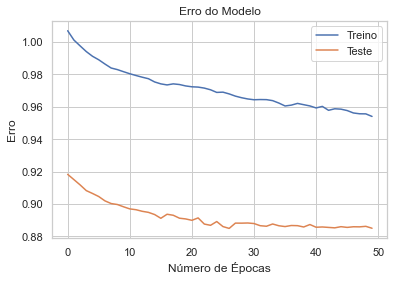

In [153]:
# Plot
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Erro do Modelo')
plt.ylabel('Erro')
plt.xlabel('Número de Épocas')
plt.legend(['Treino', 'Teste'], loc = 'upper right');

In [154]:
# Previsões
previsoes = autoencoder.predict(df_pca)
previsoes

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [3.2009957, 6.294691 , 4.3162017, ..., 1.3768675, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [155]:
# Previsões em dataframe
df_previsoes = pd.DataFrame(previsoes, columns = cols_PCA)

In [156]:
# Visualiza
df_previsoes.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.200996,6.294691,4.316202,0.000000,0.000000,3.563962,0.000000,1.376868,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.542096,0.000000,0.000000,0.000000,0.000000,1.818944,0.000000,0.000000,0.000000,0.000000


In [157]:
# Shape
df_previsoes.shape

(1070994, 10)

In [158]:
# Colunas do PCA
cols_pca = ['PCA' + str(i) for i in range(1,11)]

In [159]:
# Dataframe
df_autoencod = pd.DataFrame(0, index = np.arange(len(df_previsoes)), columns = cols_pca)

In [160]:
# Loop
for i in range(0,10):
    df_autoencod.iloc[:,i] = (df_previsoes.iloc[:,i] - df_pca_scaled_z.iloc[:,i]) ** 2

In [161]:
# Calcula o score 2
df_autoencod['Fraud Score 2'] = df_autoencod[cols_pca].sum(axis = 1) ** (1 / 2)

In [162]:
# Visualiza
df_autoencod.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,Fraud Score 2
0,0.001990,0.007166,0.001627,0.002023,0.003187,0.014521,0.001428,0.000049,0.008715,0.003959,0.211342
1,1.056960,18.134003,1.559438,2.151928,8.188489,3.223354,0.274156,0.984959,278.775287,12.479486,18.078387
2,0.000076,0.010752,0.000018,0.003105,0.000376,0.015951,0.000752,0.003438,0.303052,0.024181,0.601415
3,0.002786,0.004690,0.009365,0.005942,0.003218,0.003717,0.007917,0.000114,0.050576,0.005890,0.306945
4,93.273910,13.451864,43.387278,47.930008,319.134642,4.819579,238.177403,143.953715,10.077047,99.668315,31.841384


In [163]:
# Dataframe
df_score2 = pd.merge(df_score1.iloc[:,1:], df_autoencod.iloc[:,-1], left_index = True, right_index = True)

In [164]:
# Visualiza
df_score2.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.000000,1046.000000,NaN,4.000000,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004,X3,382.000000,318.000000,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342,0.211342
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.000000,355.000000,NaN,1.000000,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004,X3,382.000000,318.000000,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858588,18.078387
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.000000,564.000000,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004,X1,709.000000,564.000000,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.601415
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.000000,551.000000,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004,X1,85.000000,551.000000,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945,0.306945
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.000000,1260.000000,NaN,1.000000,272300000.000000,121050000.000000,122535000.000000,121050000.000000,122535

## 4. Calculando o Score Final do Score de Fraude e Apresentando os Resultados

O posto (português brasileiro) ou característica (português europeu) de uma matriz (em inglês, "matrix rank") é o número de linhas não-nulas da matriz, quando escrita na forma escalonada por linhas. Equivalentemente, corresponde ao número de linhas ou colunas linearmente independentes da matriz. A característica de uma matriz tem várias implicações em relação à independência linear e a dimensão de um espaço vetorial.

In [180]:
# Cópia do dataframe
df_fraudes = df_score2.copy()

In [183]:
# Calcula o Rank do Score 1
df_fraudes['Rank_Fraud Score 1'] = df_fraudes['Fraud Score 1'].rank(ascending = True, method = 'first')
df_fraudes.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.000000,1046.000000,NaN,4.000000,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004,X3,382.000000,318.000000,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342,0.211342,741726.000000
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.000000,355.000000,NaN,1.000000,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004,X3,382.000000,318.000000,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858588,18.078387,1070274.000000
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.000000,564.000000,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004,X1,709.000000,564.000000,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.601415,1023940.000000
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.000000,551.000000,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004,X1,85.000000,551.000000,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945,0.306945,964204.000000
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.000000,1260.000000,NaN,1.0000

In [184]:
# Calcula o Rank do Score 2
df_fraudes['Rank_Fraud Score 2'] = df_fraudes['Fraud Score 2'].rank(ascending = True, method = 'first')
df_fraudes.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.000000,1046.000000,NaN,4.000000,21400000.000000,4225500.000000,9630000.000000,4225500.000000,9630000.000000,4600.000000,1 LIBERTY ISLAND,10004,X3,382.000000,318.000000,3775500.000000,8613000.000000,3775500.000000,8613000.000000,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.211342,0.211342,741726.000000,759252.000000
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.000000,355.000000,NaN,1.000000,193800000.000000,14310000.000000,87210000.000000,14310000.000000,87210000.000000,4600.000000,1 ELLIS ISLAND,10004,X3,382.000000,318.000000,11111400.000000,80690400.000000,11111400.000000,80690400.000000,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.858588,18.078387,1070274.000000,1070227.000000
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.000000,564.000000,E,3.000000,104686000.000000,39008700.000000,47108700.000000,39008700.000000,47108700.000000,2191.000000,MARGINAL STREET,10004,X1,709.000000,564.000000,32321790.000000,40179510.000000,32321790.000000,40179510.000000,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.601415,0.601415,1023940.000000,1027514.000000
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.000000,551.000000,NaN,2.000000,39200000.000000,15255000.000000,17640000.000000,15255000.000000,17640000.000000,2191.000000,PIER 6,10004,X1,85.000000,551.000000,13644000.000000,15750000.000000,13644000.000000,15750000.000000,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.306945,0.306945,964204.000000,974980.000000
4,5,100

In [185]:
# Organiza os dados
df_fraudes.sort_values('Rank_Fraud Score 1', ascending = False).head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.000000,95.000000,NaN,1.000000,2930000.000000,1318500.000000,1318500.000000,NaN,NaN,NaN,86-55 BROADWAY,11373,NaN,1.000000,1.000000,1201200.000000,1201200.000000,NaN,NaN,NaN,FINAL,2010/11,AC-TR,0.932679,3552.965339,5459.740071,11.839361,8664.281284,9225.968208,4.730309,7525.630784,8651.551054,2.374901,20917.627942,85252.370375,9.574238,60709.723730,142805.971089,2.376405,20929.365242,85293.645699,0.346562,4297.315684,8529.211578,10.918825,24947.889183,45105.510052,3.143866,16116.564291,31912.758060,0.571506,4824.821074,10328.878197,7.967947,29889.494191,55138.591300,2.883423,17432.257841,38294.402650,1024.704961,1018.465105,1070994.000000,1070994.000000
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117.000000,108.000000,NaN,2.000000,4326303700.000000,1946836665.000000,1946836665.000000,1946836665.000000,1946836665.000000,2231.000000,FLATBUSH AVENUE,11234,X1,20.000000,52.000000,848484666.000000,848484666.000000,848484666.000000,848484666.000000,NaN,FINAL,2010/11,AC-TR,1617.350022,3990.133637,3575.629646,9968.357994,9827.199634,8897.042516,7667.182238,8900.940261,8062.175553,1562.156387,4829.247274,4625.047715,3885.067564,6817.613159,5712.758255,1561.021628,4587.663541,4474.858915,1402.666071,6633.316452,7094.088091,20453.624446,55324.430177,48347.475246,8402.770820,33377.941861,33151.872391,996.055534,6850.105430,7332.282745,13887.033346,42436.016445,39141.882967,5025.407821,24749.685481,27184.499848,914.747778,910.117723,1070993.000000,1070993.000000
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.000000,100.000000,NaN,3.000000,374019883.000000,1792808947.000000,4668308947.000000,1792808947.000000,4668308947.000000,2198.000000,154-68 BROOKVILLE BOULEVARD,11422,X4,37.500000,56.000000,1644454002.000000,4501180002.000000,1644454002.000000,4501180002.000000,NaN,FINAL,2010/11,AC-TR,7.247847,309.159692,194.077820,842.952680,5868.161765,5252.177825,1217.103627,6220.542000,5790.150710,3.475604,206.762214,132.012997,92.072767,3109.215999,1736.893245,96.331233,5447.982161,3542.682286,1.343846,261.219163,172.820560,450.994794,16153.565176,9735.156230,338.131241,27172.689482,17935.077014,2.216100,293.284416,209.285758,329.110772,19353.216175,11900.603717,310.119810,29390.962040,21521.582668,870.173055,870.019585,1070992.000000,1070992.000000
132748,132749,1018750046E,1,1875,46,E,CNY/NYCTA,U7,3,2.000000,1.000000,NaN,2.000000,710000.000000,319500.000000,319500.000000,NaN,NaN,NaN,BROADWAY,10025,NaN,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1275.342300,0.146458,0.140875,3366.871157,0.301826,0.184341,1957.483765,0.214069,0.170689,1329.817718,0.196412,0.174029,1951.487956,0.496404,0.455290,1528.

In [186]:
# Score final
df_fraudes['Final Score'] = (df_fraudes['Fraud Score 1'] * df_fraudes['Rank_Fraud Score 1']) + (df_fraudes['Fraud Score 2'] * df_fraudes['Rank_Fraud Score 2'])

In [187]:
# Rank do Score Final
df_fraudes['Final Rank'] = df_fraudes['Final Score'].rank(ascending = False, method = 'first')

In [188]:
# Resultado
df_fraudes.sort_values('Final Rank', ascending = True).head(20)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2,Final Score,Final Rank
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.000000,95.000000,NaN,1.000000,2930000.000000,1318500.000000,1318500.000000,NaN,NaN,NaN,86-55 BROADWAY,11373,NaN,1.000000,1.000000,1201200.000000,1201200.000000,NaN,NaN,NaN,FINAL,2010/11,AC-TR,0.932679,3552.965339,5459.740071,11.839361,8664.281284,9225.968208,4.730309,7525.630784,8651.551054,2.374901,20917.627942,85252.370375,9.574238,60709.723730,142805.971089,2.376405,20929.365242,85293.645699,0.346562,4297.315684,8529.211578,10.918825,24947.889183,45105.510052,3.143866,16116.564291,31912.758060,0.571506,4824.821074,10328.878197,7.967947,29889.494191,55138.591300,2.883423,17432.257841,38294.402650,1024.704961,1018.465105,1070994.000000,1070994.000000,2188222881.616439,1.000000
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117.000000,108.000000,NaN,2.000000,4326303700.000000,1946836665.000000,1946836665.000000,1946836665.000000,1946836665.000000,2231.000000,FLATBUSH AVENUE,11234,X1,20.000000,52.000000,848484666.000000,848484666.000000,848484666.000000,848484666.000000,NaN,FINAL,2010/11,AC-TR,1617.350022,3990.133637,3575.629646,9968.357994,9827.199634,8897.042516,7667.182238,8900.940261,8062.175553,1562.156387,4829.247274,4625.047715,3885.067564,6817.613159,5712.758255,1561.021628,4587.663541,4474.858915,1402.666071,6633.316452,7094.088091,20453.624446,55324.430177,48347.475246,8402.770820,33377.941861,33151.872391,996.055534,6850.105430,7332.282745,13887.033346,42436.016445,39141.882967,5025.407821,24749.685481,27184.499848,914.747778,910.117723,1070993.000000,1070993.000000,1954418178.385396,2.000000
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.000000,100.000000,NaN,3.000000,374019883.000000,1792808947.000000,4668308947.000000,1792808947.000000,4668308947.000000,2198.000000,154-68 BROOKVILLE BOULEVARD,11422,X4,37.500000,56.000000,1644454002.000000,4501180002.000000,1644454002.000000,4501180002.000000,NaN,FINAL,2010/11,AC-TR,7.247847,309.159692,194.077820,842.952680,5868.161765,5252.177825,1217.103627,6220.542000,5790.150710,3.475604,206.762214,132.012997,92.072767,3109.215999,1736.893245,96.331233,5447.982161,3542.682286,1.343846,261.219163,172.820560,450.994794,16153.565176,9735.156230,338.131241,27172.689482,17935.077014,2.216100,293.284416,209.285758,329.110772,19353.216175,11900.603717,310.119810,29390.962040,21521.582668,870.173055,870.019585,1070992.000000,1070992.000000,1863732396.361194,3.000000
132748,132749,1018750046E,1,1875,46,E,CNY/NYCTA,U7,3,2.000000,1.000000,NaN,2.000000,710000.000000,319500.000000,319500.000000,NaN,NaN,NaN,BROADWAY,10025,NaN,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1275.342300,0.146458,0.140875,3366.871157,0.301826,

## Fonte de Conteúdo:

<p style="text-align: left;">Site: <a href="http://www.rodolfoterra.com">Rodolfo Terra | Ciência de dados</a></p>

<p style="text-align: left;">Blog: <a href="https://rodolffoterra.github.io/">Aprenda Gratuitamente Linguagem R & Python</a></p>


<p style="text-align: left;">Github: <a href="https://github.com/rodolffoterra">rodolffoterra</a></p>

<p><img style="float: right;" src="imagens/logo.png" alt="RNA" /></p><br><br><br><br><br>
